# Cirrhosis Prediction Dataset

資料集:<br>
Cirrhosis Prediction Dataset<br>
https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset

# RandomForest

無最佳化

3.0    111
4.0     94
2.0     59
1.0     12
Name: Stage, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


One-vs-One Accuracy: 0.5535714285714286
One-vs-One Precision: 0.40862573099415206
One-vs-One Recall: 0.44258241758241756
One-vs-One F1 Score: 0.419593088071349
One-vs-One Cohen's Kappa: 0.3220338983050848

One-vs-All Accuracy: 0.5
One-vs-All Precision: 0.35299059139784944
One-vs-All Recall: 0.37840659340659344
One-vs-All F1 Score: 0.36103896103896105
One-vs-All Cohen's Kappa: 0.22376237623762374

Many-vs-Many Accuracy: 0.4642857142857143
Many-vs-Many Precision: 0.22448979591836735
Many-vs-Many Recall: 0.2876923076923077
Many-vs-Many F1 Score: 0.23040540540540538
Many-vs-Many Cohen's Kappa: 0.07692307692307687


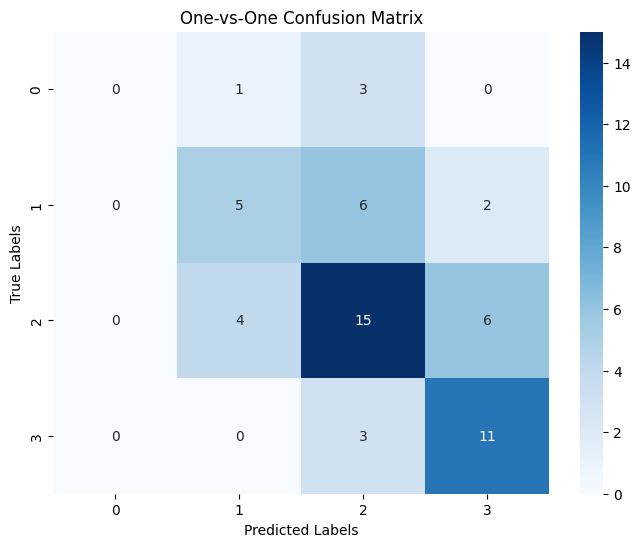

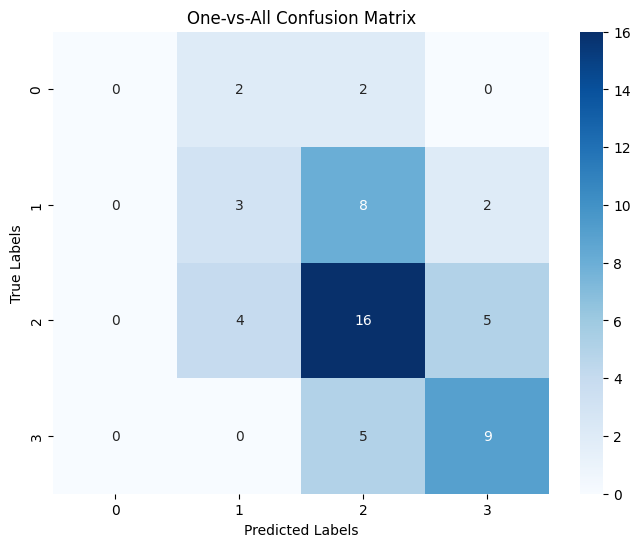

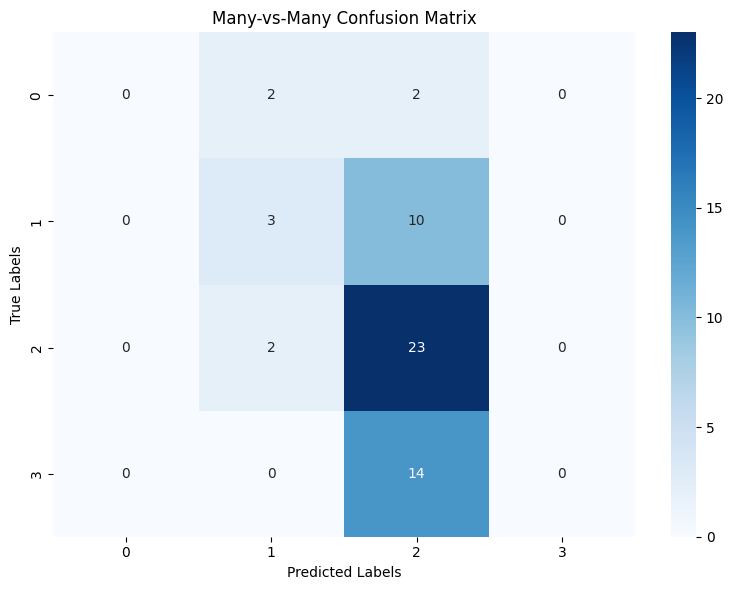

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 讀取資料集
df = pd.read_csv('/content/drive/MyDrive/cirrhosis.csv')

# 檢查並移除缺失值的列
df.dropna(inplace=True)

# 編碼字串型態的資料
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # 只處理字串型態的資料
        df[column] = label_encoder.fit_transform(df[column])

# 統計各類別數量
counts = df.iloc[:, -1].value_counts()
# 印出結果
print(counts)

# 提取特徵和標籤
X = df.iloc[:, :-1]  # 提取除了最後一欄的所有欄位作為特徵
y = df.iloc[:, -1]  # 提取最後一欄作為標籤


# 創建隨機森林模型
rf_model = RandomForestClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(rf_model)
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

# 一對多法（One-vs-All）
ova = OneVsRestClassifier(rf_model)
ova.fit(X_train, y_train)
ova_pred = ova.predict(X_test)
ova_accuracy = accuracy_score(y_test, ova_pred)
ova_precision = precision_score(y_test, ova_pred, average='macro')
ova_recall = recall_score(y_test, ova_pred, average='macro')
ova_f1 = f1_score(y_test, ova_pred, average='macro')
ova_cm = confusion_matrix(y_test, ova_pred)
ova_kappa = cohen_kappa_score(y_test, ova_pred)

# 多對多法（Many-vs-Many）
mvc = OutputCodeClassifier(rf_model)
mvc.fit(X_train, y_train)
mvc_pred = mvc.predict(X_test)
mvc_accuracy = accuracy_score(y_test, mvc_pred)
mvc_precision = precision_score(y_test, mvc_pred, average='macro')
mvc_recall = recall_score(y_test, mvc_pred, average='macro')
mvc_f1 = f1_score(y_test, mvc_pred, average='macro')
mvc_cm = confusion_matrix(y_test, mvc_pred)
mvc_kappa = cohen_kappa_score(y_test, mvc_pred)

# 打印評估結果
print("One-vs-One Accuracy:", ovo_accuracy)
print("One-vs-One Precision:", ovo_precision)
print("One-vs-One Recall:", ovo_recall)
print("One-vs-One F1 Score:", ovo_f1)
print("One-vs-One Cohen's Kappa:", ovo_kappa)
print()
print("One-vs-All Accuracy:", ova_accuracy)
print("One-vs-All Precision:", ova_precision)
print("One-vs-All Recall:", ova_recall)
print("One-vs-All F1 Score:", ova_f1)
print("One-vs-All Cohen's Kappa:", ova_kappa)
print()
print("Many-vs-Many Accuracy:", mvc_accuracy)
print("Many-vs-Many Precision:", mvc_precision)
print("Many-vs-Many Recall:", mvc_recall)
print("Many-vs-Many F1 Score:", mvc_f1)
print("Many-vs-Many Cohen's Kappa:", mvc_kappa)

#繪製混淆矩陣熱力圖
plt.figure(figsize=(8, 6))
sns.heatmap(ovo_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-One Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(ova_cm, annot=True, cmap='Blues', fmt='d')
plt.title('One-vs-All Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.figure(figsize=(8, 6))
sns.heatmap(mvc_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Many-vs-Many Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()
#print(df)

## GirdSearchCV最佳化

In [ ]:
pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 MB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearnex import patch_sklearn, config_context
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier, OutputCodeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 讀取資料集
df = pd.read_csv('/content/drive/MyDrive/cirrhosis.csv')

# 檢查並移除缺失值的列
df.dropna(inplace=True)

# 編碼字串型態的資料
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # 只處理字串型態的資料
        df[column] = label_encoder.fit_transform(df[column])

# 統計各類別數量
counts = df.iloc[:, -1].value_counts()
# 印出結果
print(counts)

# 提取特徵和標籤
X = df.iloc[:, :-1]  # 提取除了最後一欄的所有欄位作為特徵
y = df.iloc[:, -1]  # 提取最後一欄作為標籤

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# 建立隨機森林模型
rf = RandomForestClassifier(random_state=1, class_weight='balanced')

# 定義參數網格
param_grid = {
    'estimator__n_estimators': [100, 200, 300],  # 決策樹的數量
    'estimator__max_depth': [None, 5, 10],  # 決策樹的最大深度
    'estimator__min_samples_split': [2, 5, 10],  # 內部節點再切分所需的最小樣本數
    'estimator__min_samples_leaf': [1, 2, 4]  # 葉子節點最少樣本數
}

# 一對一法（One-vs-One）
ovo = OneVsOneClassifier(rf)
grid_search_ovo = GridSearchCV(estimator=ovo, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovo.fit(X_train.values, y_train)
best_model_ovo = grid_search_ovo.best_estimator_
ovo_pred = best_model_ovo.predict(X_test.values)

# 一對其餘（One-vs-Rest）
ovr = OneVsRestClassifier(rf)
grid_search_ovr = GridSearchCV(estimator=ovr, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_ovr.fit(X_train.values, y_train)
best_model_ovr = grid_search_ovr.best_estimator_
ovr_pred = best_model_ovr.predict(X_test.values)

# 多輸出編碼（OutputCode）
mvm = OutputCodeClassifier(rf)
grid_search_mvm = GridSearchCV(estimator=mvm, param_grid=param_grid, scoring='accuracy', cv=10)
grid_search_mvm.fit(X_train.values, y_train)
best_model_mvm = grid_search_mvm.best_estimator_
mvm_pred = best_model_mvm.predict(X_test.values)

# 計算評估指標
ovo_accuracy = accuracy_score(y_test, ovo_pred)
ovo_precision = precision_score(y_test, ovo_pred, average='macro')
ovo_recall = recall_score(y_test, ovo_pred, average='macro')
ovo_f1 = f1_score(y_test, ovo_pred, average='macro')
ovo_cm = confusion_matrix(y_test, ovo_pred)
ovo_kappa = cohen_kappa_score(y_test, ovo_pred)

ovr_accuracy = accuracy_score(y_test, ovr_pred)
ovr_precision = precision_score(y_test, ovr_pred, average='macro')
ovr_recall = recall_score(y_test, ovr_pred, average='macro')
ovr_f1 = f1_score(y_test, ovr_pred, average='macro')
ovr_cm = confusion_matrix(y_test, ovr_pred)
ovr_kappa = cohen_kappa_score(y_test, ovr_pred)

mvm_accuracy = accuracy_score(y_test, mvm_pred)
mvm_precision = precision_score(y_test, mvm_pred, average='macro')
mvm_recall = recall_score(y_test, mvm_pred, average='macro')
mvm_f1 = f1_score(y_test, mvm_pred, average='macro')
mvm_cm = confusion_matrix(y_test, mvm_pred)
mvm_kappa = cohen_kappa_score(y_test, mvm_pred)

# 印出結果
print("一對一法（One-vs-One）:")
print("最佳模型參數：", grid_search_ovo.best_params_)
print("準確率：", ovo_accuracy)
print("精確度：", ovo_precision)
print("召回率：", ovo_recall)
print("F1值：", ovo_f1)
print("混淆矩陣：\n", ovo_cm)
print("Kappa係數：", ovo_kappa)
print("CV 平均準確率：", grid_search_ovo.cv_results_['mean_test_score'].mean())

print("\n一對其餘（One-vs-Rest）:")
print("最佳模型參數：", grid_search_ovr.best_params_)
print("準確率：", ovr_accuracy)
print("精確度：", ovr_precision)
print("召回率：", ovr_recall)
print("F1值：", ovr_f1)
print("混淆矩陣：\n", ovr_cm)
print("Kappa係數：", ovr_kappa)
print("CV 平均準確率：", grid_search_ovr.cv_results_['mean_test_score'].mean())

print("\n多輸出編碼（OutputCode）:")
print("最佳模型參數：", grid_search_mvm.best_params_)
print("準確率：", mvm_accuracy)
print("精確度：", mvm_precision)
print("召回率：", mvm_recall)
print("F1值：", mvm_f1)
print("混淆矩陣：\n", mvm_cm)
print("Kappa係數：", mvm_kappa)
print("CV 平均準確率：", grid_search_mvm.cv_results_['mean_test_score'].mean())


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


3.0    111
4.0     94
2.0     59
1.0     12
Name: Stage, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


一對一法（One-vs-One）:
最佳模型參數： {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}
準確率： 0.44642857142857145
精確度： 0.41544704006004307
召回率： 0.5059065934065934
F1值： 0.4269794721407625
混淆矩陣：
 [[ 3  1  0  0]
 [ 3  3  5  2]
 [ 5  4 10  6]
 [ 0  1  4  9]]
Kappa係數： 0.23253757736516345
CV 平均準確率： 0.4356902356902357

一對其餘（One-vs-Rest）:
最佳模型參數： {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
準確率： 0.5
精確度： 0.4845588235294118
召回率： 0.6068681318681318
F1值： 0.49922003284072247
混淆矩陣：
 [[ 4  0  0  0]
 [ 3  5  4  1]
 [ 5  5 10  5]
 [ 0  2  3  9]]
Kappa係數： 0.3173704832390073
CV 平均準確率： 0.47317620650953984

多輸出編碼（OutputCode）:
最佳模型參數： {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 300}
準確率： 0.375
精確度： 0.40595238095238095
召回率： 0.5105494505494506
F1值： 0.36886271150139216
混淆矩陣：
 